### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import models
import matplotlib.pyplot as plt
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DL/dataset/S_train.csv', infer_datetime_format=True,
                parse_dates={'dt' : ['Unnamed: 0']},
                 index_col='dt')

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/DL/dataset/S_test.csv', infer_datetime_format=True,
                parse_dates={'dt' : ['Unnamed: 0']},
                 index_col='dt')

### Initial Pre-processing

In [ ]:
train_data = np.asarray(df)
test_data = np.asarray(df2)

In [ ]:
train_data.shape

(3523, 12)

In [ ]:
hell = train_data[len(train_data)-24:].tolist()

In [ ]:
with open("sample_s.json", "w") as outfile:
    json.dump(hell, outfile)

In [ ]:
def create_training_sequence(data, sequence_length, step_size):
    sequences = []
    targets = []
    for i in range(0, len(data) - sequence_length-step_size):
        seq = data[i:i+sequence_length]
        target = data[i+sequence_length:i + sequence_length + step_size, 11]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [ ]:
def create_test_sequence(data, sequence_length, step_size):
    hell = train_data[len(train_data)-sequence_length:].tolist()
    well = test_data[:step_size, 11].tolist()
    a = hell.copy()
    b = well.copy()
    sequences = [a.copy()]
    targets = [b.copy()]
    for i in range(0, len(data) - step_size):
        a.append(data[i].tolist())
        a.pop(0)
        b.append(data[i+step_size, 11].tolist())
        b.pop(0)
        sequences.append(a.copy())
        targets.append(b.copy())
    return np.array(sequences), np.array(targets)

### Step-size: 1

#### Pre-processing

In [ ]:
time_step_1 = 1
sequence_length_1 = 24
X_train_1, y_train_1 = create_training_sequence(train_data, sequence_length_1, time_step_1)

In [ ]:
X_train_1.shape, y_train_1.shape

((3498, 24, 12), (3498, 1))

In [ ]:
X_test_1, y_test_1 = create_test_sequence(test_data, sequence_length_1, time_step_1)

In [ ]:
X_test_1.shape, y_test_1.shape

((858, 24, 12), (858, 1))

#### Training the model

In [ ]:
model_1 = Sequential()
model_1.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_1, X_train_1.shape[2])))
model_1.add(Dropout(0.2))
model_1.add(Dense(units=time_step_1))

In [ ]:
model_1.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_1.fit(X_train_1, y_train_1, epochs=100, batch_size=32)

Epoch 1/100
110/110 [==============================] - 3s 13ms/step - loss: 631.7650
Epoch 2/100
110/110 [==============================] - 2s 19ms/step - loss: 1071.4469
Epoch 3/100
110/110 [==============================] - 2s 20ms/step - loss: 237.5922
Epoch 4/100
110/110 [==============================] - 2s 20ms/step - loss: 198.9644
Epoch 5/100
110/110 [==============================] - 2s 17ms/step - loss: 198.3331
Epoch 6/100
110/110 [==============================] - 1s 13ms/step - loss: 161.8888
Epoch 7/100
110/110 [==============================] - 1s 13ms/step - loss: 147.0050
Epoch 8/100
110/110 [==============================] - 1s 13ms/step - loss: 134.7726
Epoch 9/100
110/110 [==============================] - 1s 13ms/step - loss: 142.5416
Epoch 10/100
110/110 [==============================] - 1s 13ms/step - loss: 123.8379
Epoch 11/100
110/110 [==============================] - 1s 13ms/step - loss: 256.0845
Epoch 12/100
110/110 [==============================] - 2s 15m

#### Testing the mode

In [ ]:
y_pred_1 = model_1.predict(X_test_1)

27/27 [==============================] - 1s 7ms/step


In [ ]:
y_test_1.shape, y_pred_1.shape

((858, 1), (858, 1))

In [ ]:
mse_1 = mean_squared_error(y_test_1, y_pred_1)
mae_1 = mean_absolute_error(y_test_1, y_pred_1)

In [ ]:
print(f'Mean Squared Error: {mse_1}')
print(f'Mean Absolute Error: {mae_1}')

Mean Squared Error: 29.670975697666695
Mean Absolute Error: 3.8402858369556063


#### Visualizing y_pred vs y_test

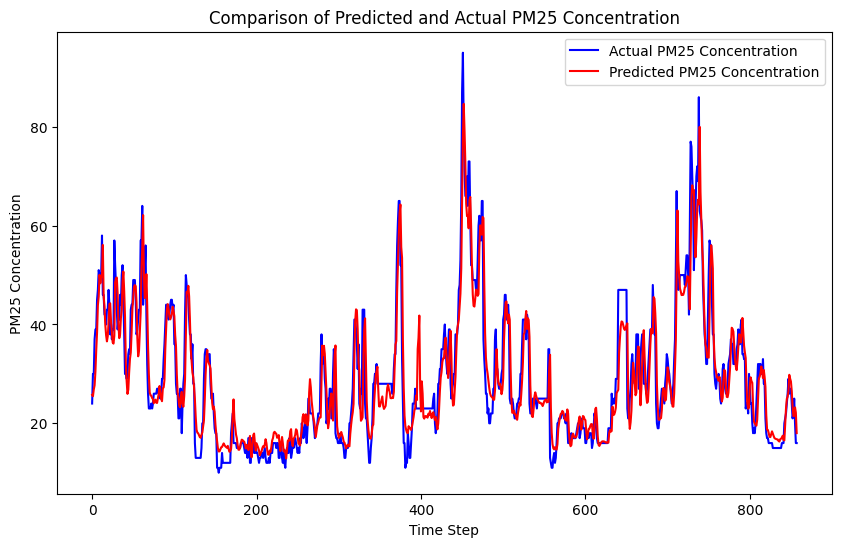

In [ ]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_1, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_1, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [ ]:
model_1.save("/content/drive/MyDrive/DL/S_model_1")

In [ ]:
loaded_model_1 = models.load_model("/content/drive/MyDrive/DL/S_model_1")

### Step-size: 7

#### Pre-processing

In [ ]:
time_step_7 = 7
sequence_length_7 = 24
X_train_7, y_train_7 = create_training_sequence(train_data, sequence_length_7, time_step_7)

In [ ]:
X_train_7.shape, y_train_7.shape

((3492, 24, 12), (3492, 7))

In [ ]:
X_test_7, y_test_7 = create_test_sequence(test_data, sequence_length_7, time_step_7)

In [ ]:
X_test_7.shape, y_test_7.shape

((852, 24, 12), (852, 7))

#### Training the model

In [ ]:
model_7 = Sequential()
model_7.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_7, X_train_7.shape[2])))
model_7.add(Dropout(0.2))
model_7.add(Dense(units=time_step_7))
model_7.compile(optimizer='adam', loss='mean_squared_error')
model_7.fit(X_train_7, y_train_7, epochs=100, batch_size=32)

Epoch 1/100
110/110 [==============================] - 3s 13ms/step - loss: 1773.3566
Epoch 2/100
110/110 [==============================] - 1s 13ms/step - loss: 544.1721
Epoch 3/100
110/110 [==============================] - 1s 13ms/step - loss: 311.3241
Epoch 4/100
110/110 [==============================] - 1s 13ms/step - loss: 236.9165
Epoch 5/100
110/110 [==============================] - 1s 13ms/step - loss: 219.4410
Epoch 6/100
110/110 [==============================] - 1s 13ms/step - loss: 224.0038
Epoch 7/100
110/110 [==============================] - 2s 19ms/step - loss: 194.6497
Epoch 8/100
110/110 [==============================] - 2s 21ms/step - loss: 237.8311
Epoch 9/100
110/110 [==============================] - 2s 20ms/step - loss: 206.5786
Epoch 10/100
110/110 [==============================] - 2s 16ms/step - loss: 185.6038
Epoch 11/100
110/110 [==============================] - 1s 13ms/step - loss: 172.9808
Epoch 12/100
110/110 [==============================] - 1s 13m

#### Testing the model

In [ ]:
y_pred_7 = model_7.predict(X_test_7)

27/27 [==============================] - 0s 5ms/step


In [ ]:
y_test_7.shape, y_pred_7.shape

((852, 7), (852, 7))

In [ ]:
mse_7 = mean_squared_error(y_test_7, y_pred_7)
mae_7 = mean_absolute_error(y_test_7, y_pred_7)

In [ ]:
print(f'Mean Squared Error: {mse_7}')
print(f'Mean Absolute Error: {mae_7}')

Mean Squared Error: 96.66557194993541
Mean Absolute Error: 6.998083803335506


#### Visualizing y_pred vs y_test

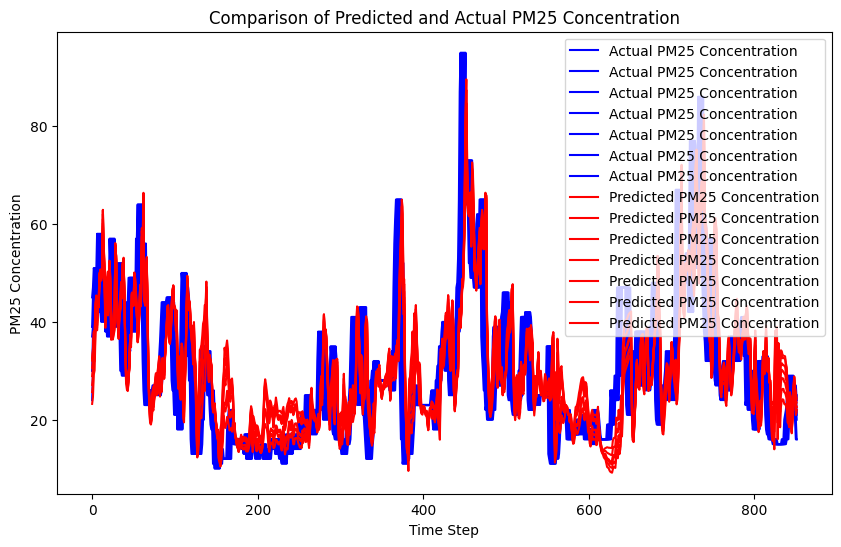

In [ ]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_7, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_7, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [ ]:
model_7.save("/content/drive/MyDrive/DL/S_model_7")

In [ ]:
loaded_model_7 = models.load_model("/content/drive/MyDrive/DL/S_model_7")

### Step-size: 14

#### Pre-processing

In [ ]:
time_step_14 = 14
sequence_length_14 = 24
X_train_14, y_train_14 = create_training_sequence(train_data, sequence_length_14, time_step_14)

In [ ]:
X_train_14.shape, y_train_14.shape

((3485, 24, 12), (3485, 14))

In [ ]:
X_test_14, y_test_14 = create_test_sequence(test_data, sequence_length_14, time_step_14)

In [ ]:
X_test_14.shape, y_test_14.shape

((845, 24, 12), (845, 14))

#### Training the model

In [ ]:
model_14 = Sequential()
model_14.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_14, X_train_14.shape[2])))
model_14.add(Dropout(0.2))
model_14.add(Dense(units=time_step_14))
model_14.compile(optimizer='adam', loss='mean_squared_error')
model_14.fit(X_train_14, y_train_14, epochs=100, batch_size=32)

Epoch 1/100
109/109 [==============================] - 3s 14ms/step - loss: 1192.7395
Epoch 2/100
109/109 [==============================] - 1s 14ms/step - loss: 472.8523
Epoch 3/100
109/109 [==============================] - 1s 13ms/step - loss: 420.2589
Epoch 4/100
109/109 [==============================] - 1s 14ms/step - loss: 333.1043
Epoch 5/100
109/109 [==============================] - 2s 19ms/step - loss: 324.6540
Epoch 6/100
109/109 [==============================] - 2s 22ms/step - loss: 364.3723
Epoch 7/100
109/109 [==============================] - 2s 21ms/step - loss: 424.8300
Epoch 8/100
109/109 [==============================] - 2s 17ms/step - loss: 315.1913
Epoch 9/100
109/109 [==============================] - 1s 13ms/step - loss: 282.8620
Epoch 10/100
109/109 [==============================] - 1s 13ms/step - loss: 266.9227
Epoch 11/100
109/109 [==============================] - 1s 14ms/step - loss: 258.3182
Epoch 12/100
109/109 [==============================] - 1s 13m

#### Testing the model

In [ ]:
y_pred_14 = model_14.predict(X_test_14)

27/27 [==============================] - 0s 5ms/step


In [ ]:
y_test_14.shape, y_pred_14.shape

((845, 14), (845, 14))

In [ ]:
mse_14 = mean_squared_error(y_test_14, y_pred_14)
mae_14 = mean_absolute_error(y_test_14, y_pred_14)

In [ ]:
print(f'Mean Squared Error: {mse_14}')
print(f'Mean Absolute Error: {mae_14}')

Mean Squared Error: 135.76530328147183
Mean Absolute Error: 8.385779420420564


#### Visualizing y_pred vs y_test

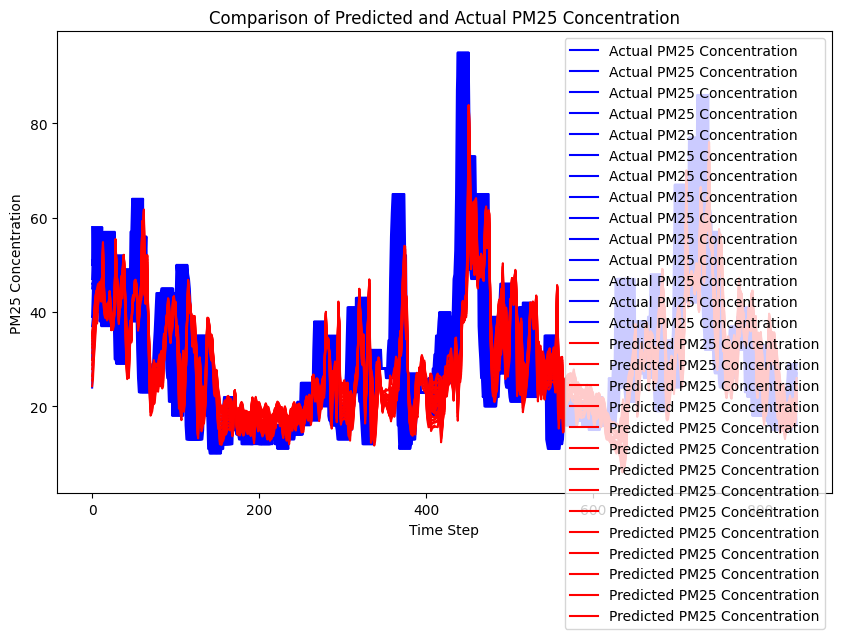

In [ ]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_14, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_14, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [ ]:
model_14.save("/content/drive/MyDrive/DL/S_model_14")

In [ ]:
loaded_model_14 = models.load_model("/content/drive/MyDrive/DL/S_model_14")

### Step-size: 30

#### Pre-processing

In [ ]:
time_step_30 = 30
sequence_length_30 = 24
X_train_30, y_train_30 = create_training_sequence(train_data, sequence_length_30, time_step_30)

In [ ]:
X_train_30.shape, y_train_30.shape

((3469, 24, 12), (3469, 30))

In [ ]:
X_test_30, y_test_30 = create_test_sequence(test_data, sequence_length_30, time_step_30)

In [ ]:
X_test_30.shape, y_test_30.shape

((829, 24, 12), (829, 30))

#### Training the model

In [ ]:
model_30= Sequential()
model_30.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_30, X_train_30.shape[2])))
model_30.add(Dropout(0.2))
model_30.add(Dense(units=time_step_30))
model_30.compile(optimizer='adam', loss='mean_squared_error')
model_30.fit(X_train_30, y_train_30, epochs=100, batch_size=32)

Epoch 1/100
109/109 [==============================] - 3s 13ms/step - loss: 1376.7974
Epoch 2/100
109/109 [==============================] - 1s 13ms/step - loss: 509.3200
Epoch 3/100
109/109 [==============================] - 1s 13ms/step - loss: 412.0530
Epoch 4/100
109/109 [==============================] - 1s 13ms/step - loss: 387.5825
Epoch 5/100
109/109 [==============================] - 1s 13ms/step - loss: 353.0690
Epoch 6/100
109/109 [==============================] - 2s 15ms/step - loss: 341.3481
Epoch 7/100
109/109 [==============================] - 2s 20ms/step - loss: 319.3568
Epoch 8/100
109/109 [==============================] - 2s 20ms/step - loss: 323.4557
Epoch 9/100
109/109 [==============================] - 2s 21ms/step - loss: 332.3238
Epoch 10/100
109/109 [==============================] - 1s 13ms/step - loss: 309.8733
Epoch 11/100
109/109 [==============================] - 1s 13ms/step - loss: 302.6983
Epoch 12/100
109/109 [==============================] - 1s 13m

#### Testing the model

In [ ]:
y_pred_30 = model_30.predict(X_test_30)

26/26 [==============================] - 0s 5ms/step


In [ ]:
y_test_30.shape, y_pred_30.shape

((829, 30), (829, 30))

In [ ]:
mse_30 = mean_squared_error(y_test_30, y_pred_30)
mae_30 = mean_absolute_error(y_test_30, y_pred_30)

In [ ]:
print(f'Mean Squared Error: {mse_30}')
print(f'Mean Absolute Error: {mae_30}')

Mean Squared Error: 173.27380701401435
Mean Absolute Error: 10.069234659856802


#### Visualizing y_pred vs y_test

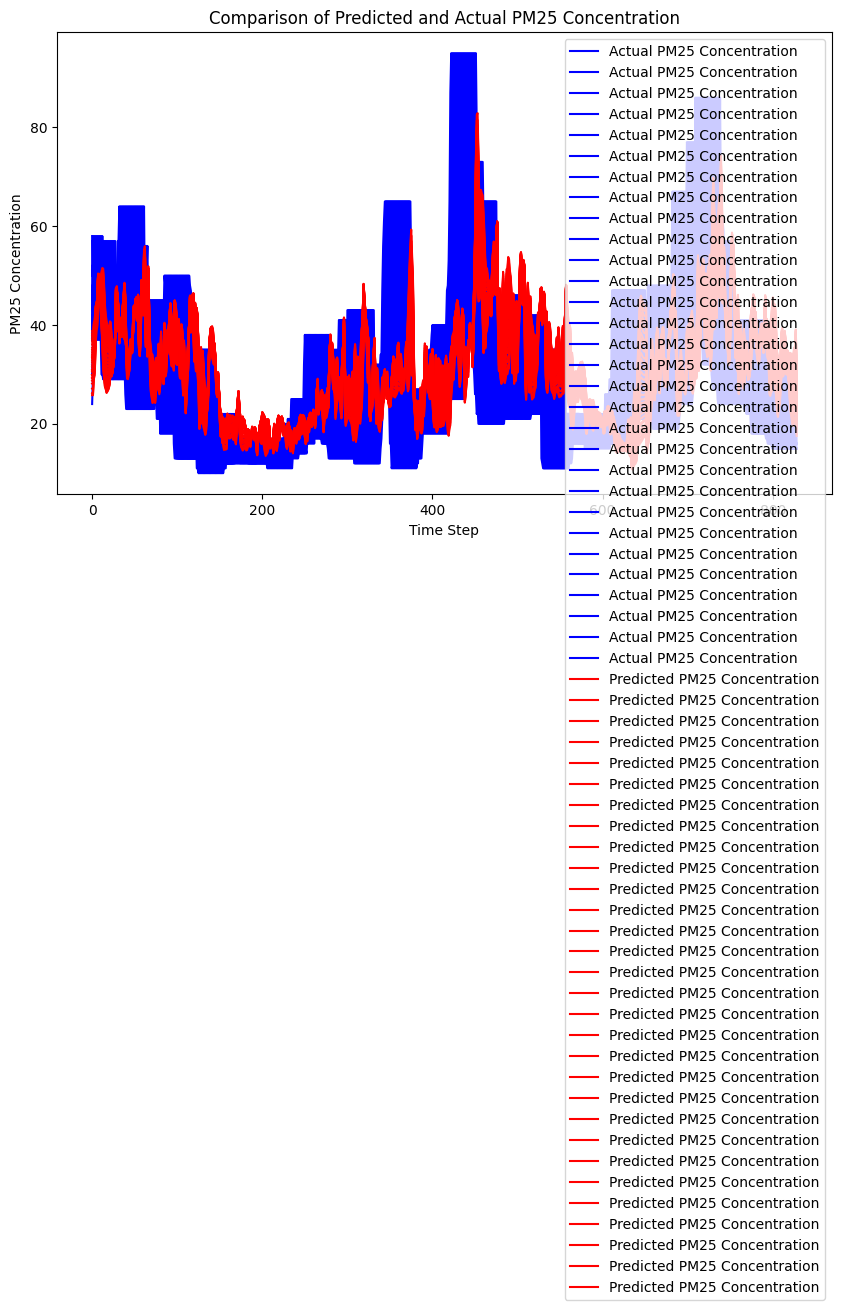

In [ ]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_30, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_30, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [ ]:
model_30.save("/content/drive/MyDrive/DL/S_model_30")

In [ ]:
loaded_model_30 = models.load_model("/content/drive/MyDrive/DL/S_model_30")

### Step-size: 60

#### Pre-processing

In [ ]:
time_step_60 = 60
sequence_length_60 = 24
X_train_60, y_train_60 = create_training_sequence(train_data, sequence_length_60, time_step_60)

In [ ]:
X_train_60.shape, y_train_60.shape

((3439, 24, 12), (3439, 60))

In [ ]:
X_test_60, y_test_60 = create_test_sequence(test_data, sequence_length_60, time_step_60)

In [ ]:
X_test_60.shape, y_test_60.shape

((799, 24, 12), (799, 60))

#### Training the model

In [ ]:
model_60 = Sequential()
model_60.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_60, X_train_60.shape[2])))
model_60.add(Dropout(0.2))
model_60.add(Dense(units=time_step_60))
model_60.compile(optimizer='adam', loss='mean_squared_error')
model_60.fit(X_train_60, y_train_60, epochs=100, batch_size=32)

Epoch 1/100
108/108 [==============================] - 3s 13ms/step - loss: 1668.1858
Epoch 2/100
108/108 [==============================] - 1s 13ms/step - loss: 561.8776
Epoch 3/100
108/108 [==============================] - 1s 13ms/step - loss: 497.5458
Epoch 4/100
108/108 [==============================] - 2s 14ms/step - loss: 441.5373
Epoch 5/100
108/108 [==============================] - 2s 21ms/step - loss: 416.0359
Epoch 6/100
108/108 [==============================] - 2s 21ms/step - loss: 399.4753
Epoch 7/100
108/108 [==============================] - 2s 21ms/step - loss: 578.9681
Epoch 8/100
108/108 [==============================] - 2s 14ms/step - loss: 746.7827
Epoch 9/100
108/108 [==============================] - 1s 13ms/step - loss: 492.8257
Epoch 10/100
108/108 [==============================] - 1s 13ms/step - loss: 470.0190
Epoch 11/100
108/108 [==============================] - 1s 14ms/step - loss: 441.9751
Epoch 12/100
108/108 [==============================] - 1s 13m

#### Testing the model

In [ ]:
y_pred_60 = model_60.predict(X_test_60)

25/25 [==============================] - 0s 5ms/step


In [ ]:
y_test_60.shape, y_pred_60.shape

((799, 60), (799, 60))

In [ ]:
mse_60 = mean_squared_error(y_test_60, y_pred_60)
mae_60 = mean_absolute_error(y_test_60, y_pred_60)

In [ ]:
print(f'Mean Squared Error: {mse_60}')
print(f'Mean Absolute Error: {mae_60}')

Mean Squared Error: 255.5384599837925
Mean Absolute Error: 12.565951332908698


#### Visualizing y_pred vs y_test

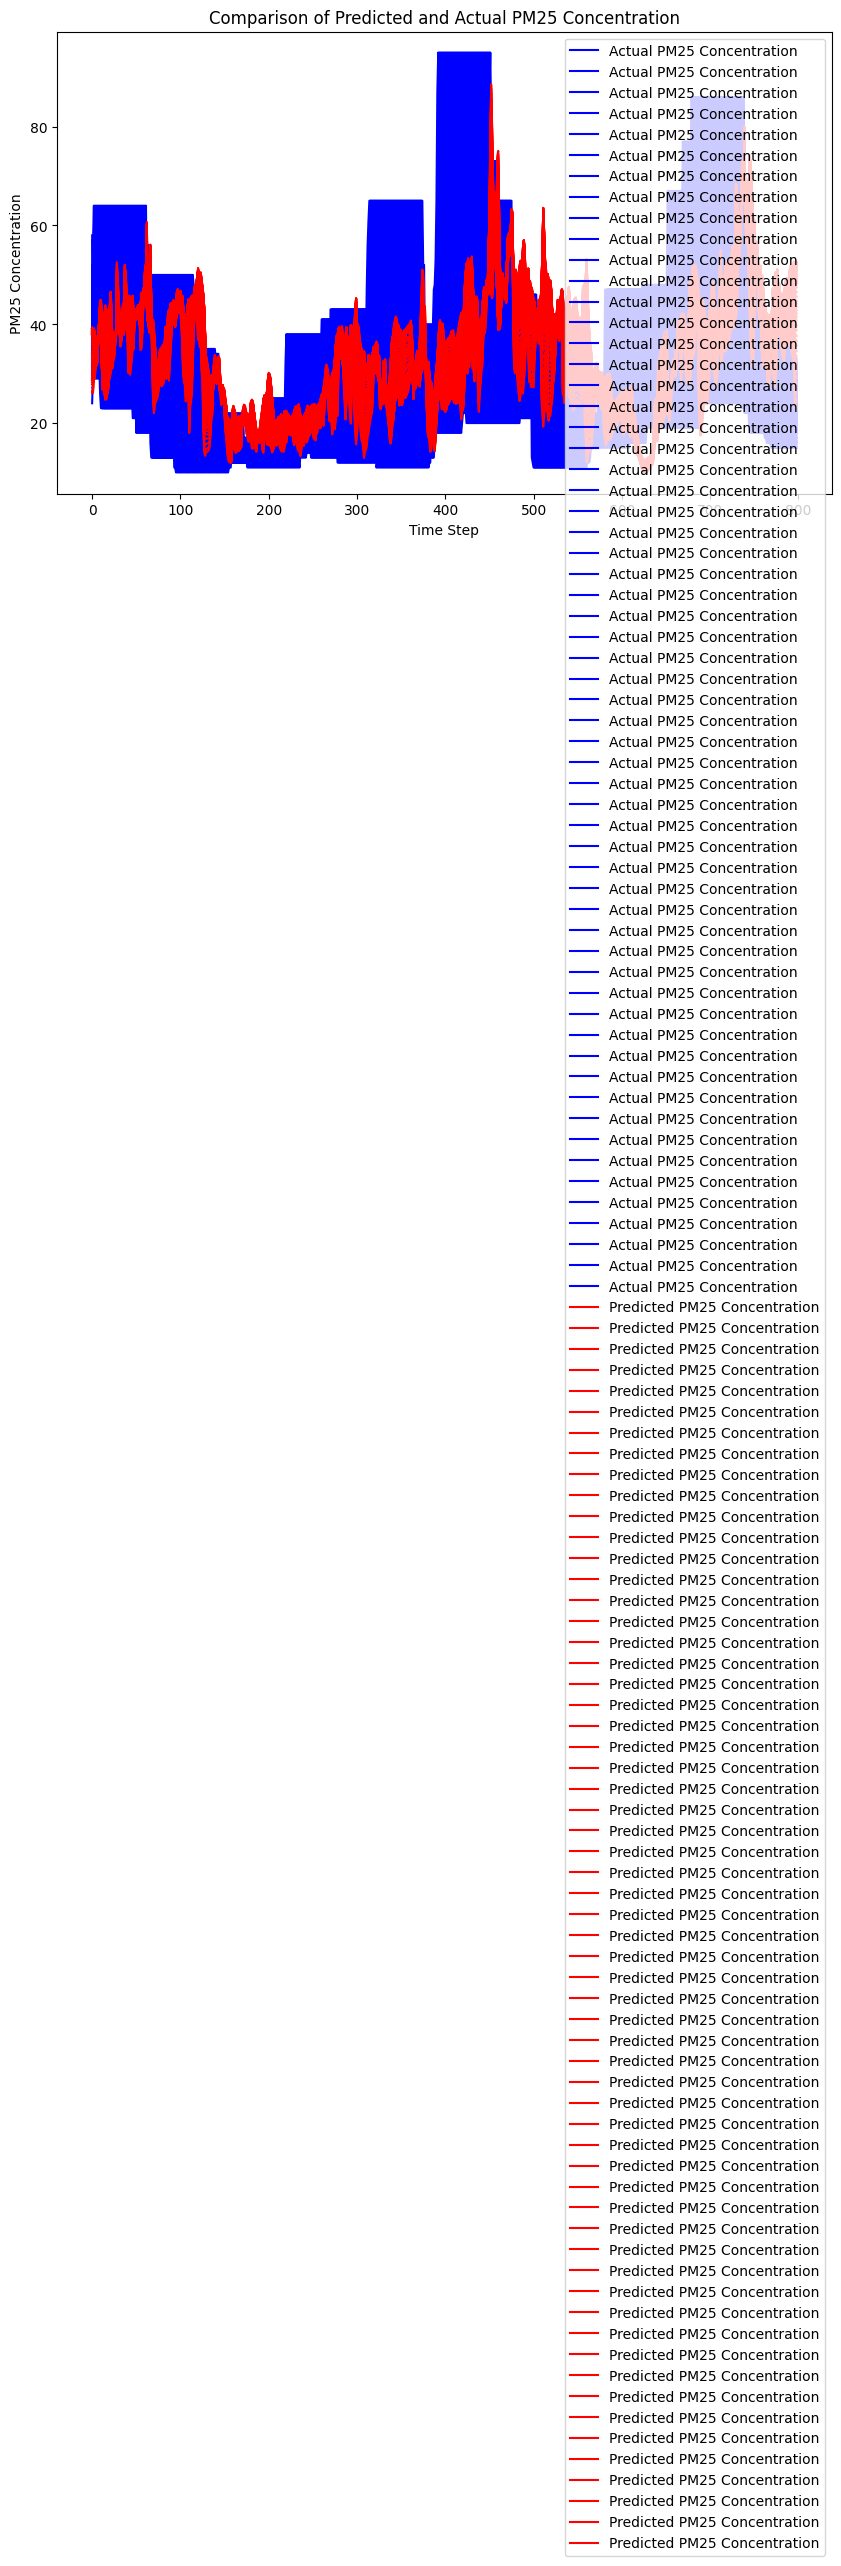

In [ ]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_60, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_60, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [ ]:
model_60.save("/content/drive/MyDrive/DL/S_model_60")

In [ ]:
loaded_model_60 = models.load_model("/content/drive/MyDrive/DL/S_model_60")